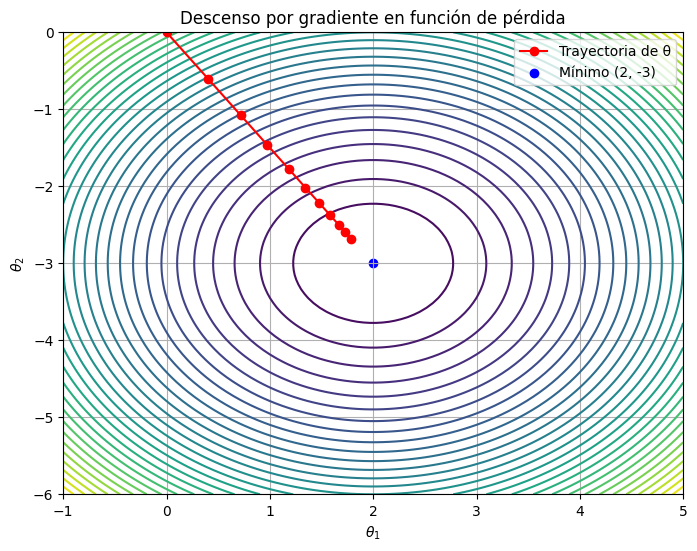

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Función de pérdida: L(θ) = (θ1 - 2)^2 + (θ2 + 3)^2
def loss(theta):
    return (theta[0] - 2)**2 + (theta[1] + 3)**2

# Gradiente de la función de pérdida
def grad(theta):
    return np.array([2*(theta[0] - 2), 2*(theta[1] + 3)])

# Gradiente descendente paso a paso
theta = np.array([0.0, 0.0])  # Punto inicial
eta = 0.1  # Tasa de aprendizaje
steps = 10

# Guardamos para graficar el recorrido
trajectory = [theta.copy()]

for _ in range(steps):
    g = grad(theta)
    theta = theta - eta * g  # Actualizamos theta restando gradiente escalado
    trajectory.append(theta.copy())

trajectory = np.array(trajectory)

# Graficamos la función de pérdida y el recorrido de theta
theta1 = np.linspace(-1, 5, 100)
theta2 = np.linspace(-6, 0, 100)
T1, T2 = np.meshgrid(theta1, theta2)
Z = (T1 - 2)**2 + (T2 + 3)**2

plt.figure(figsize=(8,6))
plt.contour(T1, T2, Z, levels=30, cmap='viridis')
plt.plot(trajectory[:,0], trajectory[:,1], 'ro-', label='Trayectoria de θ')
plt.scatter([2], [-3], c='blue', label='Mínimo (2, -3)')
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.title('Descenso por gradiente en función de pérdida')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
import numpy as np

# Estados y acciones
S = [0,1]  # 2 estados
A = [0,1]  # 2 acciones

num_s = len(S)
num_a = len(A)

# Matrices de transición para cada acción: P_a[s,s']
P = {
    0: np.array([[0.7, 0.3],
                 [0.4, 0.6]]),
    1: np.array([[0.9, 0.1],
                 [0.2, 0.8]])
}

# Política pi(a|s): num_s x num_a
pi = np.array([
    [0.6, 0.4],  # en estado 0, 60% acción 0, 40% acción 1
    [0.3, 0.7]   # en estado 1, 30% acción 0, 70% acción 1
])

# --- Construcción de P_pi con indicadora ---
# P_pi_1 es de tamaño (num_s*num_a) x (num_s*num_a)
P_pi_1 = np.zeros((num_s*num_a, num_s*num_a))

for i_s, s in enumerate(S):
    for i_a, a in enumerate(A):
        for j_s, s_prime in enumerate(S):
            for j_a, a_prime in enumerate(A):
                idx_from = i_s * num_a + i_a
                idx_to = j_s * num_a + j_a
                if a == a_prime:
                    P_pi_1[idx_from, idx_to] = P[a][i_s, j_s]
                else:
                    P_pi_1[idx_from, idx_to] = 0

print("P_pi con indicadora a=a':")
print(P_pi_1)

# --- Construcción de P_pi con política ---
P_pi_2 = np.zeros((num_s*num_a, num_s*num_a))

for i_s, s in enumerate(S):
    for i_a, a in enumerate(A):
        for j_s, s_prime in enumerate(S):
            for j_a, a_prime in enumerate(A):
                idx_from = i_s * num_a + i_a
                idx_to = j_s * num_a + j_a
                # P(s'|s,a) * pi(a'|s')
                P_pi_2[idx_from, idx_to] = P[a][i_s, j_s] * pi[j_s, j_a]

print("\nP_pi con política:")
print(P_pi_2)


P_pi con indicadora a=a':
[[0.7 0.  0.3 0. ]
 [0.  0.9 0.  0.1]
 [0.4 0.  0.6 0. ]
 [0.  0.2 0.  0.8]]

P_pi con política:
[[0.42 0.28 0.09 0.21]
 [0.54 0.36 0.03 0.07]
 [0.24 0.16 0.18 0.42]
 [0.12 0.08 0.24 0.56]]


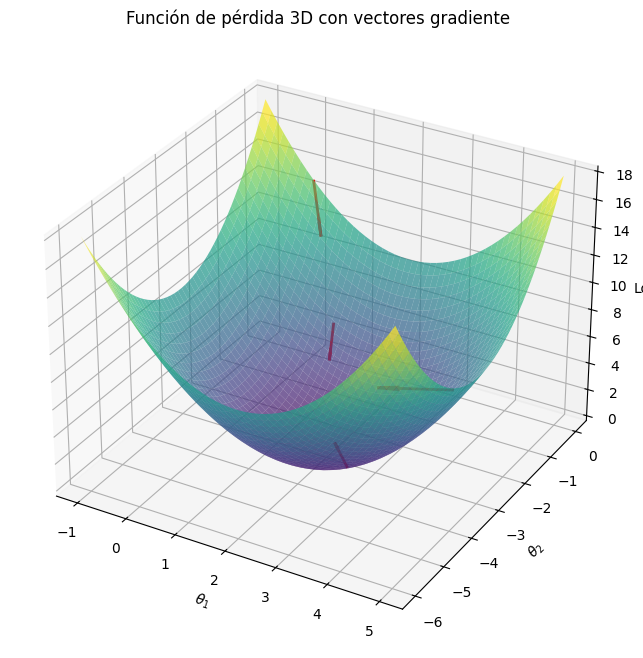

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Función de pérdida
def loss(theta1, theta2):
    return (theta1 - 2)**2 + (theta2 + 3)**2

# Gradiente (devuelve vector 2D)
def grad(theta1, theta2):
    return np.array([2*(theta1 - 2), 2*(theta2 + 3)])

# Crear malla para superficie
theta1 = np.linspace(-1, 5, 50)
theta2 = np.linspace(-6, 0, 50)
T1, T2 = np.meshgrid(theta1, theta2)
Z = loss(T1, T2)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

# Pintar superficie de la función de pérdida
ax.plot_surface(T1, T2, Z, cmap='viridis', alpha=0.7)

# Elegimos puntos donde dibujar el gradiente
puntos = np.array([
    [0, 0],
    [1, -1],
    [3, -4],
    [4, -2]
])

# Dibujar gradientes como flechas en esos puntos
for (x, y) in puntos:
    z = loss(x, y)
    g = grad(x, y)
    # Para que la flecha no sea demasiado grande, la escalamos
    escala = 0.3
    ax.quiver(x, y, z, -g[0]*escala, -g[1]*escala, 0, color='red', linewidth=2)

# Etiquetas y título
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$\theta_2$')
ax.set_zlabel('Loss')
ax.set_title('Función de pérdida 3D con vectores gradiente')

plt.show()


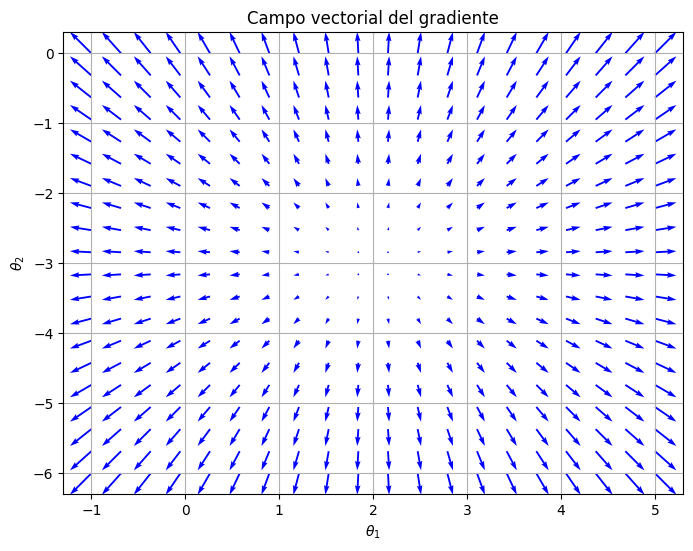

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Gradiente vectorial
def grad(theta1, theta2):
    return np.array([2*(theta1 - 2), 2*(theta2 + 3)])

# Crear una rejilla de puntos
theta1 = np.linspace(-1, 5, 20)
theta2 = np.linspace(-6, 0, 20)
T1, T2 = np.meshgrid(theta1, theta2)

# Calcular componentes del gradiente en cada punto
G = grad(T1, T2)
G1 = G[0]
G2 = G[1]

plt.figure(figsize=(8,6))
plt.quiver(T1, T2, G1, G2, color='blue')
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.title('Campo vectorial del gradiente')
plt.grid(True)
plt.show()


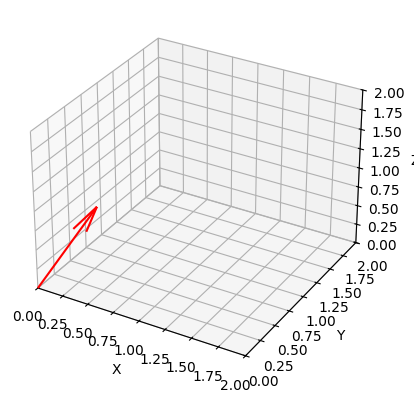

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crear figura y ejes 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Punto de origen del vector
origin = np.array([0, 0, 0])

# Vector a representar (puedes cambiar estos valores)
vector = np.array([1, 2, 3])

# Dibujar la flecha desde origin hasta origin + vector
ax.quiver(origin[0], origin[1], origin[2],
          vector[0], vector[1], vector[2],
          length=1, normalize=True, color='r')

# Configurar límites para verlo bien
ax.set_xlim([0, 2])
ax.set_ylim([0, 2])
ax.set_zlim([0, 2])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


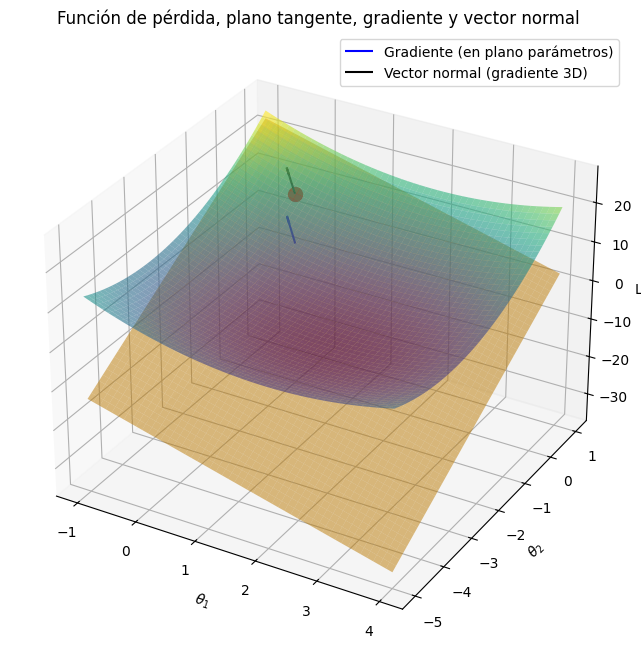

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función de pérdida
def L(theta1, theta2):
    return (theta1 - 2)**2 + (theta2 + 3)**2

# Derivadas parciales (componentes del gradiente)
def dL_dtheta1(theta1):
    return 2*(theta1 - 2)

def dL_dtheta2(theta2):
    return 2*(theta2 + 3)

# Punto donde evaluamos
theta0 = np.array([0,0])
z0 = L(theta0[0], theta0[1])

# Gradiente en theta0
grad = np.array([dL_dtheta1(theta0[0]), dL_dtheta2(theta0[1])])

# Coordenadas para la superficie
theta1_vals = np.linspace(-1, 4, 50)
theta2_vals = np.linspace(-5, 1, 50)
T1, T2 = np.meshgrid(theta1_vals, theta2_vals)
Z = L(T1, T2)

# Plano tangente en el punto theta0
# Ecuación del plano: 
# z = z0 + dL/dtheta1 * (theta1 - theta0_1) + dL/dtheta2 * (theta2 - theta0_2)
plane = z0 + grad[0]*(T1 - theta0[0]) + grad[1]*(T2 - theta0[1])

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

# Superficie de la función
ax.plot_surface(T1, T2, Z, alpha=0.6, cmap='viridis')

# Plano tangente
ax.plot_surface(T1, T2, plane, alpha=0.5, color='orange')

# Punto theta0 en la superficie
ax.scatter(theta0[0], theta0[1], z0, color='red', s=100)

# Vector gradiente en 2D (en el plano theta1-theta2) — representado en 3D con z=0 para verlo
ax.quiver(theta0[0], theta0[1], 0, grad[0], grad[1], 0, color='blue', length=1, normalize=True, label='Gradiente (en plano parámetros)')

# Vector normal a la superficie (gradiente 3D)
# Este vector es (dL/dtheta1, dL/dtheta2, -1)
normal = np.array([grad[0], grad[1], -1])
# Lo normalizamos para que se vea bien
normal = normal / np.linalg.norm(normal)

ax.quiver(theta0[0], theta0[1], z0, normal[0], normal[1], normal[2], color='black', length=1, normalize=True, label='Vector normal (gradiente 3D)')

ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$\theta_2$')
ax.set_zlabel('L(θ)')
ax.set_title('Función de pérdida, plano tangente, gradiente y vector normal')
ax.legend()

plt.show()


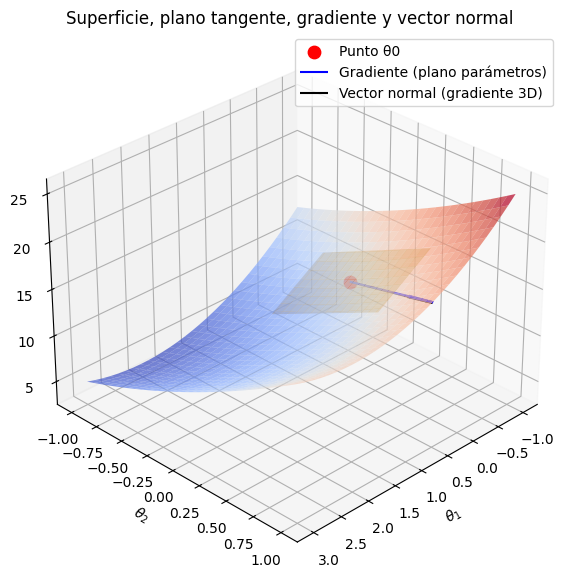

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Función de pérdida
def L(theta1, theta2):
    return (theta1 - 2)**2 + (theta2 + 3)**2

# Derivadas parciales
def dL_dtheta1(theta1):
    return 2 * (theta1 - 2)

def dL_dtheta2(theta2):
    return 2 * (theta2 + 3)

# Punto de interés
theta0 = np.array([0, 0])
z0 = L(theta0[0], theta0[1])
grad = np.array([dL_dtheta1(theta0[0]), dL_dtheta2(theta0[1])])

# Coordenadas para la superficie (zona pequeña alrededor de theta0)
theta1_vals = np.linspace(-1, 3, 30)
theta2_vals = np.linspace(-1, 1, 30)
T1, T2 = np.meshgrid(theta1_vals, theta2_vals)
Z = L(T1, T2)

# Plano tangente en el punto theta0 (rejilla pequeña)
plane_size = 0.5
t1_plane = np.linspace(theta0[0] - plane_size, theta0[0] + plane_size, 10)
t2_plane = np.linspace(theta0[1] - plane_size, theta0[1] + plane_size, 10)
T1_plane, T2_plane = np.meshgrid(t1_plane, t2_plane)
plane = z0 + grad[0]*(T1_plane - theta0[0]) + grad[1]*(T2_plane - theta0[1])

# Vector normal 3D (incluye el -1)
normal = np.array([grad[0], grad[1], -1])
normal = normal / np.linalg.norm(normal)  # normalizamos para que se vea bien

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Dibujamos superficie
ax.plot_surface(T1, T2, Z, alpha=0.7, cmap='coolwarm', edgecolor='none')

# Dibujamos plano tangente pequeño
ax.plot_surface(T1_plane, T2_plane, plane, alpha=0.5, color='orange')

# Punto (theta0, z0)
ax.scatter(theta0[0], theta0[1], z0, color='red', s=80, label='Punto θ0')

# Vector gradiente (en el plano θ1-θ2, con z= z0 para posicionarlo)
ax.quiver(theta0[0], theta0[1], z0, grad[0], grad[1], 0, color='blue', length=0.7, normalize=True, label='Gradiente (plano parámetros)')

# Vector normal a la superficie (en 3D)
ax.quiver(theta0[0], theta0[1], z0, normal[0], normal[1], normal[2], color='black', length=0.7, normalize=True, label='Vector normal (gradiente 3D)')

ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$\theta_2$')
ax.set_zlabel(r'$L(\theta)$')
ax.set_title('Superficie, plano tangente, gradiente y vector normal')
ax.legend()

# Mejor ángulo para ver
ax.view_init(elev=30, azim=45)

plt.show()


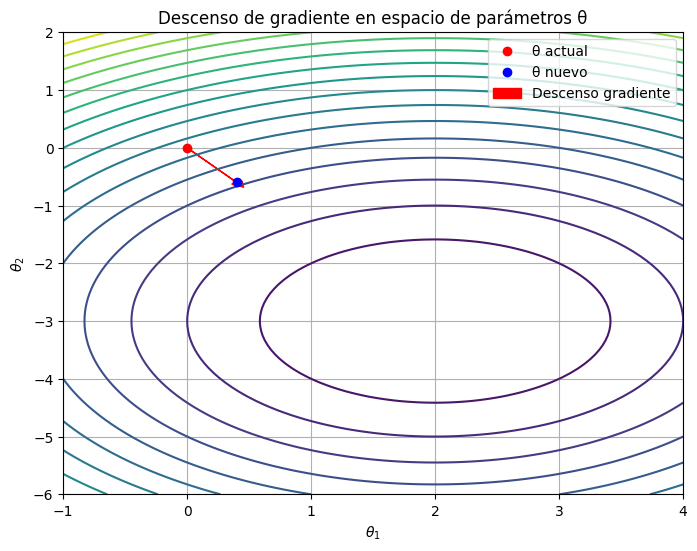

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Función de pérdida
def L(theta):
    return (theta[0]-2)**2 + (theta[1]+3)**2

# Gradiente
def grad_L(theta):
    return np.array([2*(theta[0]-2), 2*(theta[1]+3)])

# Punto inicial
theta = np.array([0.0, 0.0])
eta = 0.1

# Cálculo del gradiente y nuevo punto
g = grad_L(theta)
theta_new = theta - eta * g

# Malla para contornos
x = np.linspace(-1, 4, 100)
y = np.linspace(-6, 2, 100)
X, Y = np.meshgrid(x, y)
Z = (X - 2)**2 + (Y + 3)**2

plt.figure(figsize=(8,6))
plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.plot(theta[0], theta[1], 'ro', label='θ actual')
plt.plot(theta_new[0], theta_new[1], 'bo', label='θ nuevo')

# Vector gradiente en θ actual
plt.arrow(theta[0], theta[1], -eta*g[0], -eta*g[1], 
          head_width=0.1, head_length=0.1, fc='red', ec='red', label='Descenso gradiente')

plt.legend()
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.title('Descenso de gradiente en espacio de parámetros θ')
plt.grid(True)
plt.show()


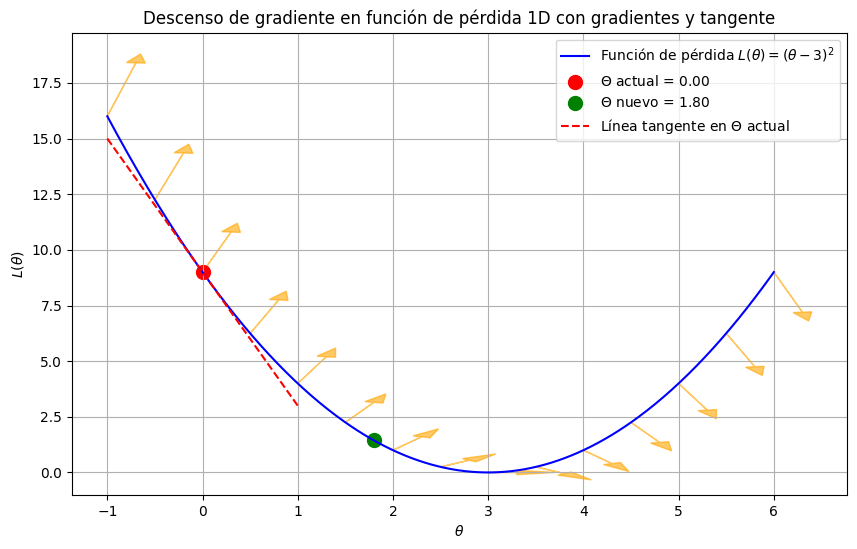

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Función de pérdida
def L(theta):
    return (theta - 3)**2

# Gradiente (derivada)
def grad_L(theta):
    return 2 * (theta - 3)

# Parámetros
theta_vals = np.linspace(-1, 6, 400)
L_vals = L(theta_vals)

# Punto inicial
theta_actual = 0.0
L_actual = L(theta_actual)
grad_actual = grad_L(theta_actual)

# Paso de learning rate
eta = 0.3
theta_nuevo = theta_actual - eta * grad_actual
L_nuevo = L(theta_nuevo)

plt.figure(figsize=(10,6))

# Dibuja la función de pérdida
plt.plot(theta_vals, L_vals, label='Función de pérdida $L(\\theta) = (\\theta - 3)^2$', color='blue')

# Dibuja el gradiente en varios puntos con flechas (derivadas)
for t in np.linspace(-1, 6, 15):
    g = grad_L(t)
    # La flecha la dibujo en el punto (t, L(t))
    # Dirección negativa del gradiente para que se vea descenso
    plt.arrow(t, L(t), 0.3, -g * 0.3, head_width=0.2, head_length=0.4, fc='orange', ec='orange', alpha=0.6)

# Dibuja punto actual
plt.scatter([theta_actual], [L_actual], color='red', s=100, label=f'$\Theta$ actual = {theta_actual:.2f}')

# Dibuja nuevo punto tras actualización
plt.scatter([theta_nuevo], [L_nuevo], color='green', s=100, label=f'$\Theta$ nuevo = {theta_nuevo:.2f}')

# Dibuja línea tangente en punto actual (aproximación lineal)
# y = L(theta_actual) + grad_L(theta_actual)*(theta - theta_actual)
tangent_x = np.linspace(theta_actual - 1, theta_actual + 1, 100)
tangent_y = L_actual + grad_actual * (tangent_x - theta_actual)
plt.plot(tangent_x, tangent_y, 'r--', label='Línea tangente en $\Theta$ actual')

# Añadir detalles
plt.title('Descenso de gradiente en función de pérdida 1D con gradientes y tangente')
plt.xlabel('$\\theta$')
plt.ylabel('$L(\\theta)$')
plt.legend()
plt.grid(True)
plt.ylim(bottom=-1)
plt.show()
